# Increasing Breast Cancer Awareness

In [10]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [11]:
df=pd.read_csv("breast_cancer_survival.csv")
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

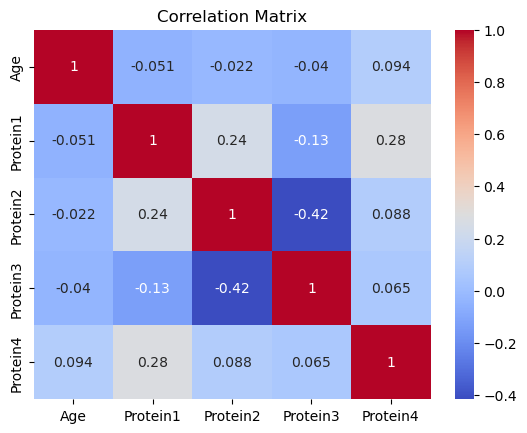

In [6]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualization

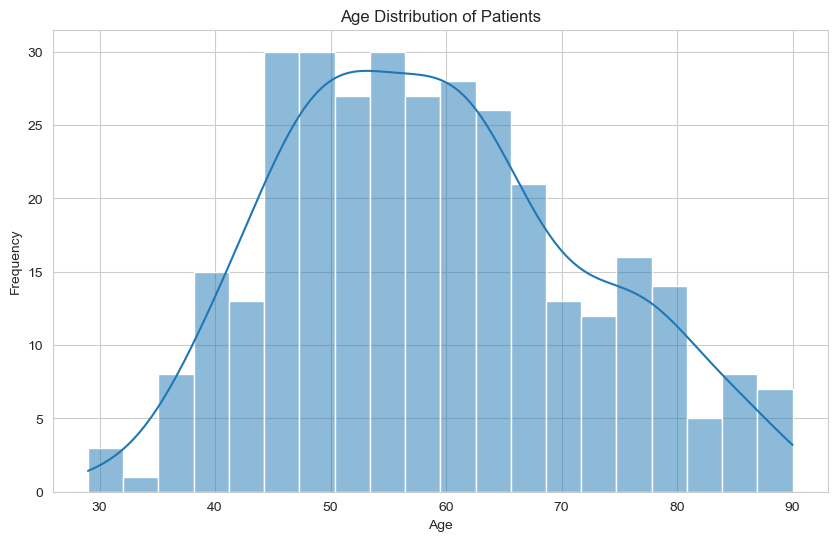

In [9]:
# Create a histogram for the Age column
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

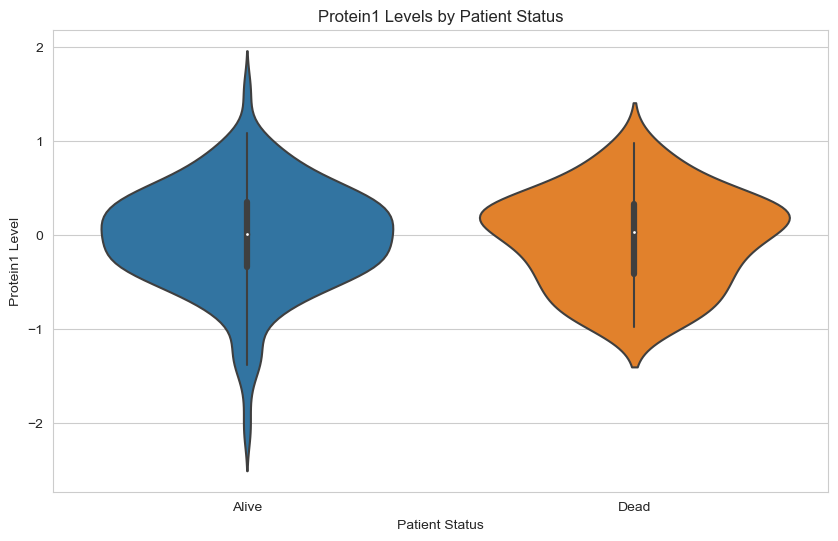

In [14]:
# Create a violin plot for the Protein1 levels by patient status
plt.figure(figsize=(10,6))
sns.violinplot(x='Patient_Status', y='Protein1', data=df)
plt.title('Protein1 Levels by Patient Status')
plt.xlabel('Patient Status')
plt.ylabel('Protein1 Level')
plt.show()
#people with more protein level chances of being alive is high


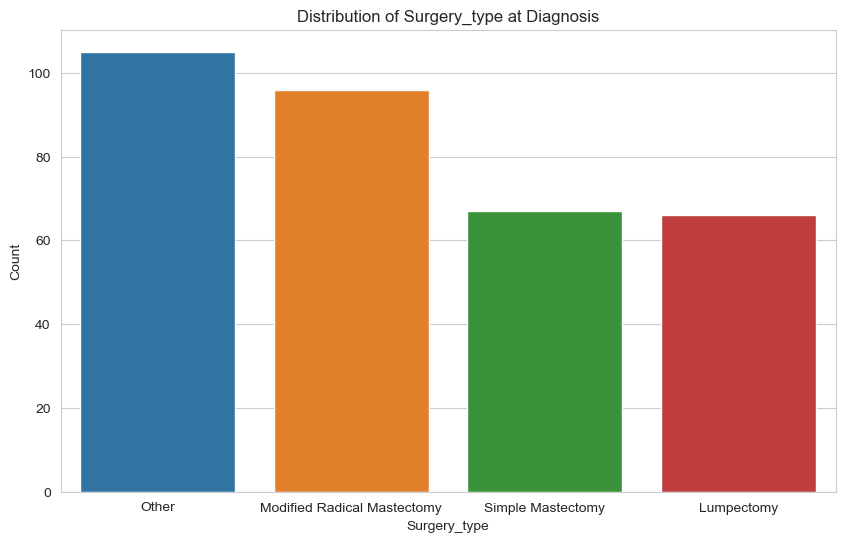

In [12]:
# Create a countplot for the Surgery_type column
plt.figure(figsize=(10,6))
sns.countplot(x='Surgery_type', data=df, order=df['Surgery_type'].value_counts().index)
plt.title('Distribution of Surgery_type at Diagnosis')
plt.xlabel('Surgery_type')
plt.ylabel('Count')
plt.show()

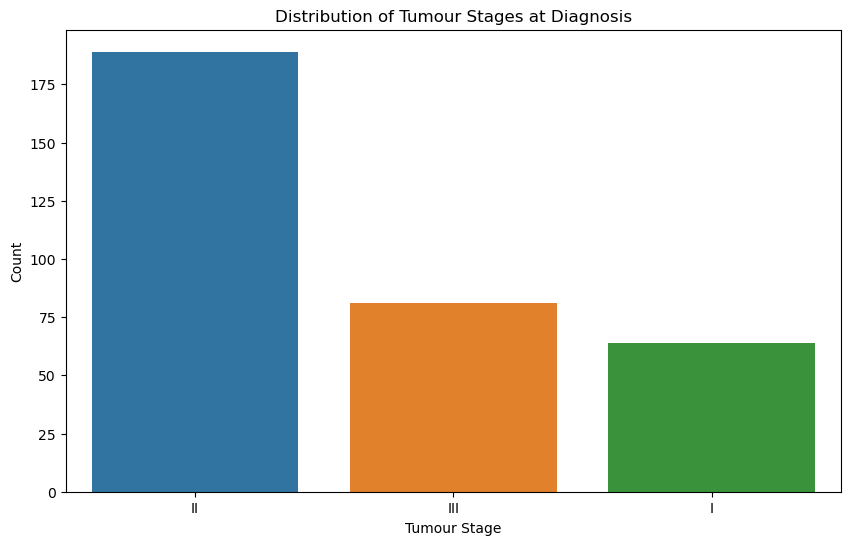

In [8]:
# Create a countplot for the Tumour_Stage column
plt.figure(figsize=(10,6))
sns.countplot(x='Tumour_Stage', data=df, order=df['Tumour_Stage'].value_counts().index)
plt.title('Distribution of Tumour Stages at Diagnosis')
plt.xlabel('Tumour Stage')
plt.ylabel('Count')
plt.show()

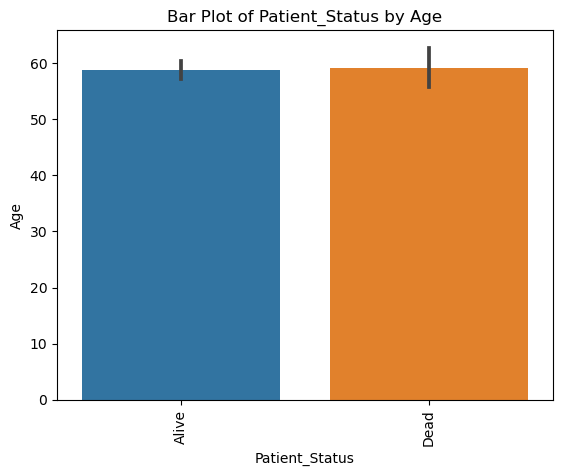

In [3]:
sns.barplot(data=df, x='Patient_Status', y='Age')
plt.title('Bar Plot of Patient_Status by Age')
plt.xticks(rotation=90)
plt.show()

# Preprocessing

In [7]:
df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [12]:
df.head(15)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
5,80,FEMALE,0.46647,2.57970,-1.253700,0.151540,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jun-18,16-Feb-19,Alive
6,66,FEMALE,-0.72486,-0.28289,0.959430,0.350900,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,27-Oct-18,19-Jun-19,Alive
7,36,FEMALE,0.46931,1.55260,-0.165240,-0.275990,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,19-Jul-18,30-Jun-19,Alive
8,58,FEMALE,-1.26850,0.10613,1.135200,-0.394920,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,15-Jun-18,16-Dec-19,Alive
9,62,FEMALE,0.64934,1.81680,0.279260,0.132280,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,20-Jun-19,NaN,NaN


In [13]:
df['Patient_Status'].replace(['Dead', 'Alive'],
                        [0, 1], inplace=True)

In [14]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,1.0
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,0.0
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,1.0
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,1.0
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,1.0
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,1.0
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,0.0
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,1.0


In [15]:
df = df.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit'], axis=1)

In [16]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1.0
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,0.0
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,1.0
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1.0
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,1.0
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,1.0
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,0.0
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,1.0


In [17]:
#This line of code is dropping rows (axis 0) from the DataFrame df where the 'Patient_Status' column has missing (NaN) values
df = df.dropna(subset=['Patient_Status'])
print(df.columns.tolist())

['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type', 'Patient_Status']


In [18]:
categorical_columns = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']
df = pd.get_dummies(df, columns=categorical_columns)
df.head()

,Age,Protein1,Protein2,Protein3,Protein4,Patient_Status,Gender_FEMALE,Gender_MALE,Tumour_Stage_I,Tumour_Stage_II,...,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,ER status_Positive,PR status_Positive,HER2 status_Negative,HER2 status_Positive,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,42,0.95256,2.15000,0.007972,-0.048340,1.0,1,0,0,1,...,0,0,1,1,1,0,0,0,1,0
1,54,0.00000,1.38020,-0.498030,-0.507320,0.0,1,0,0,1,...,0,0,1,1,1,0,0,0,1,0
2,63,-0.52303,1.76400,-0.370190,0.010815,1.0,1,0,0,1,...,0,0,1,1,1,0,1,0,0,0
3,78,-0.87618,0.12943,-0.370380,0.132190,1.0,1,0,1,0,...,0,0,1,1,1,0,0,0,1,0
4,42,0.22611,1.74910,-0.543970,-0.390210,1.0,1,0,0,1,...,0,0,1,1,0,1,1,0,0,0


# Model building

In [19]:
# # Define your features and target variable
# features = list(df.columns)
# features.remove('Patient_Status')
# target = ['Patient_Status']

# Split the data into features and target variable
X = df.drop(columns='Patient_Status',axis=1)
y = df['Patient_Status']

# Apply normalization operation for numerical stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
#Logistic regression
# Fit a binary classification model such as Logistic Regression to the train data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_pred = clf.predict(X_test)

Accuracy:  0.8615384615384616
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.86      1.00      0.93        56

    accuracy                           0.86        65
   macro avg       0.43      0.50      0.46        65
weighted avg       0.74      0.86      0.80        65



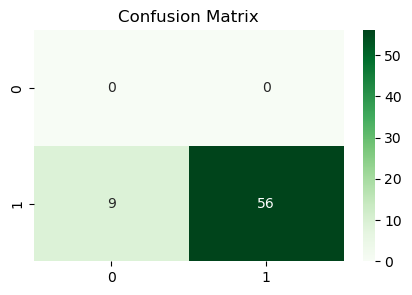

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)
print(classification_report(y_test,y_pred))

cf = confusion_matrix(y_pred,y_test)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cf, annot=True, cmap="Greens");

In [21]:
#Randomforest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_prediction =rf_model.predict(X_test)

Accuracy:  0.8307692307692308
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.86      0.96      0.91        56

    accuracy                           0.83        65
   macro avg       0.43      0.48      0.45        65
weighted avg       0.74      0.83      0.78        65



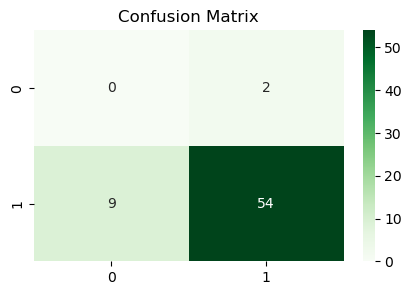

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_prediction)
print("Accuracy: ", accuracy)
print(classification_report(y_test,y_prediction))

cf = confusion_matrix(y_prediction,y_test)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cf, annot=True, cmap="Greens");

In [23]:
#KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test data using the trained model
y_predict =knn_model.predict(X_test)

Accuracy:  0.8307692307692308
              precision    recall  f1-score   support

         0.0       0.33      0.22      0.27         9
         1.0       0.88      0.93      0.90        56

    accuracy                           0.83        65
   macro avg       0.61      0.58      0.59        65
weighted avg       0.81      0.83      0.82        65



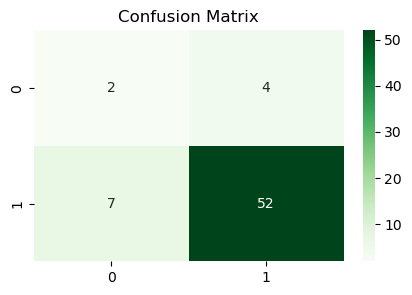

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
accuracy = accuracy_score(y_test,y_predict)
print("Accuracy: ", accuracy)
print(classification_report(y_test,y_predict))

cf = confusion_matrix(y_predict,y_test)
plt.figure(figsize=(5,3))
plt.title("Confusion Matrix")
sns.heatmap(cf, annot=True, cmap="Greens");